In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Import and Install 

In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Thesis/Code')

In [4]:
pip install ta

  Created wheel for ta: filename=ta-0.8.0-py3-none-any.whl size=28895 sha256=5c8a009d4749af99b97f6b2d165d630eb6787f50773e1473f6da73eca3faad60
  Stored in directory: /root/.cache/pip/wheels/7e/da/86/65cba22446ae2ef148de2079907264ef27feecfb7f51a45e0d
Successfully built ta


In [5]:
pip install pyts

     |████████████████████████████████| 2.5 MB 7.4 MB/s 


In [6]:
pip install fracdiff

     |████████████████████████████████| 9.8 MB 7.5 MB/s 
     |████████████████████████████████| 38.1 MB 401 kB/s 
     |████████████████████████████████| 15.7 MB 82.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which i

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow as tf
import itertools
import random
import utils

from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField, MarkovTransitionField
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report, accuracy_score
from sklearn.feature_selection import SelectFromModel
from statsmodels.tsa.stattools import adfuller

from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras import models, layers
from tensorflow.keras.models import load_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from functools import partial

import warnings
warnings.filterwarnings("ignore")

from labeling import *

In [8]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
np.random.RandomState(199)

RandomState(MT19937) at 0x7F429EFADAF0

# Feature Creation

In [10]:
path = '/content/drive/MyDrive/Thesis/DATA'
data = utils.data_loader(path=(path+"/VGT_historical data_2005.csv"))

# data = utils.append_var_to_data(data, "copper", (path+"/Copper Futures Historical Data.csv"))
data = utils.append_var_to_data(data, "gold", (path+"/Gold Futures Historical Data.csv"))
# data = utils.append_var_to_data(data, "gas", (path+"/Natural Gas Futures Historical Data.csv"))
data = utils.append_var_to_data(data, "oil", (path+"/Crude Oil WTI Futures Historical Data.csv"))

data = utils.append_var_to_data(data, "s&p500", (path+"/S_P 500 Historical Data.csv"))
# data = utils.append_var_to_data(data, "dow_jones", (path+"/Dow Jones 30 Futures Historical Data.csv"))

data = utils.append_var_to_data(data, "eur_usd", (path+"/EUR_USD Historical Data.csv"))
# data = utils.append_var_to_data(data, "usd_cny", (path+"/USD_CNY Historical Data.csv"))


data.replace(',','', regex=True, inplace=True)
data=data[data.columns].astype(np.float)
data.head()

,close,open,high,low,volume,change%,gold,oil,s&p500,eur_usd
key_0,,,,,,,,,,
2005-01-03,46.56,47.46,47.46,46.56,8300.0,-1.06,428.7,42.12,NaN,1.3463
2005-01-04,45.60,46.73,46.73,45.54,6400.0,-2.06,428.5,43.91,NaN,1.3272
2005-01-05,45.36,45.60,45.60,45.36,1900.0,-0.53,426.6,43.39,NaN,1.3262
2005-01-06,45.19,45.56,45.56,45.19,6800.0,-0.37,421.0,45.56,NaN,1.3171
2005-01-07,45.22,45.25,45.27,44.95,2900.0,0.07,418.9,45.43,NaN,1.3054


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3775 entries, 2005-01-03 to 2019-12-31
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   close    3775 non-null   float64
 1   open     3775 non-null   float64
 2   high     3775 non-null   float64
 3   low      3775 non-null   float64
 4   volume   3775 non-null   float64
 5   change%  3775 non-null   float64
 6   gold     3774 non-null   float64
 7   oil      3772 non-null   float64
 8   s&p500   3521 non-null   float64
 9   eur_usd  3775 non-null   float64
dtypes: float64(10)
memory usage: 324.4 KB


In [12]:
data.drop("change%", axis=1, inplace=True)

In [13]:
from technical_indicators_elisa import *

data = data.loc['2008-10-01':]
indicators = TechnicalIndicator(data)

indicators.get_kst() # KST Oscillator
indicators.get_ppo(col_name="close")
indicators.get_MACD()
indicators.get_rsi()
indicators.get_roc()
indicators.get_williamR()
indicators.get_CCI()

indicators.get_sma(window=5)
indicators.get_sma(window=10)
indicators.get_sma(window=20)

indicators.get_ema(window=5)
indicators.get_ema(window=10)
indicators.get_ema(window=20)

indicators.get_kc(window=10,  window_atr=5)
indicators.get_atr(window=10)

In [14]:
data = indicators.df

In [15]:
data.dropna(inplace=True)

# drop inf
print("Total inf values: ", np.isinf(data).values.sum())
drop = data.columns.to_series()[np.isinf(data).any()]
print("Cols with inf: ",drop.values)
data.drop(drop.values, inplace=True, axis=1)
print("Cols with inf dropped")

data = indicators.df
data.head(1)

Total inf values:  0
Cols with inf:  []
Cols with inf dropped


,close,open,high,low,volume,gold,oil,s&p500,eur_usd,kst,ppo,macd,rsi_14,roc_12,wr_14,cci_20,sma_5,sma_10,sma_20,ema_5,ema_10,ema_20,kc_hband_10,kc_lband_10,kc_mband_10,atr_10
key_0,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-11-05,36.99,38.58,38.69,36.89,770750.0,741.3,65.3,952.77,1.2952,-370.467534,-3.153979,-1.221688,43.419419,-5.973564,-42.128936,-0.209157,37.926,36.716,37.3815,37.616992,37.454055,38.141002,41.009229,33.898881,37.454055,2.101651


In [16]:
data.columns

Index(['close', 'open', 'high', 'low', 'volume', 'gold', 'oil', 's&p500',
       'eur_usd', 'kst', 'ppo', 'macd', 'rsi_14', 'roc_12', 'wr_14', 'cci_20',
       'sma_5', 'sma_10', 'sma_20', 'ema_5', 'ema_10', 'ema_20', 'kc_hband_10',
       'kc_lband_10', 'kc_mband_10', 'atr_10'],
      dtype='object')

# Labeling

In [17]:
barriers_df, labels, _ = get_labels_daily(data, (1,1))
data["Y"] = labels
data = data.loc['2008-12-1':]
weights={}
data = data.loc["2009-01-01":]
unique, counts = np.unique(data.Y, return_counts=True)

for cl in range(3):
    print("Class ", unique[cl], ": ", counts[cl])
    weights[unique[cl]]=counts[cl]/sum(counts)
print("\n-1.0 = SELL \n0.0 = HOLD \n1.0 = BUY")
data["Y"] = labels

print("NOT FINAL!!")

Class  -1.0 :  677
Class  0.0 :  1363
Class  1.0 :  728

-1.0 = SELL 
0.0 = HOLD 
1.0 = BUY
NOT FINAL!!


# Financial Evaluation of Trading Strategy

In [18]:
from financial_eval import financial_performance_model_short
financial_performance_model_short(data, data.Y)

Day 1: purchase of 282.34 units for total of 9995 euros

Day 2:
Total sale:338.81 units for total of 12364.95 euros
Closed long position: 282.34 units
New short position: 56.47 units

Day 11:
Short position closed: repurchase of 56.47 shares.
Long position built: 333.07 units. Total value: 10568.16 euros

Day 17:
Total sale:399.68 units for total of 13919.85 euros
Closed long position: 333.07 units
New short position: 66.61 units

Day 21:
Short position closed: repurchase of 66.61 shares.
Long position built: 344.22 units. Total value: 11658.77 euros

Day 25:
Total sale:413.06 units for total of 14885.81 euros
Closed long position: 344.22 units
New short position: 68.84 units

Day 34:
Short position closed: repurchase of 68.84 shares.
Long position built: 409.34 units. Total value: 12738.51 euros

Day 38:
Total sale:491.21 units for total of 15502.5 euros
Closed long position: 409.34 units
New short position: 81.87 units

Day 40:
Short position closed: repurchase of 81.87 shares.
Long 

# Train Test Split

In [19]:
train_size = int(0.8*len(data)) # 80%/20% split -> to be discussed 
test_size = len(data) - train_size

X_train, y_train = data[:train_size], data.Y[:train_size]
X_test, y_test = data[train_size:], data.Y[train_size:]

X_train.drop("Y", inplace=True, axis=1)
X_test.drop("Y", inplace=True, axis=1)

# Stationarity

In [20]:
data_copy = data.copy()

# data_copy.to_csv('/content/drive/MyDrive/Thesis/Code/Model/CodeCode/Colab5/data_copy_VGT.csv')
# data_copy = pd.read_csv('/content/drive/MyDrive/Thesis/Code/Model/CodeCode/Colab5/data_copy_VGT.csv', index_col="key_0")

In [21]:
# make data staionary
# make data staionary
from fracdiff.sklearn import FracdiffStat, Fracdiff
for col in X_train.columns: 
    dickey_fuller = adfuller(X_train[col], maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    if dickey_fuller[0] > dickey_fuller[4]["5%"]:
        f = FracdiffStat(stattest='ADF', pvalue=0.05)
        print("Differencing for ", col)
        x = X_train[col].values.reshape(-1, 1)
        X_train[col] = f.fit_transform(x).flatten()
        print(f.d_)

        y = X_test[col].values.reshape(-1, 1)
        X_test[col] = f.transform(y).flatten()

Differencing for  close
[0.890625]
Differencing for  open
[0.890625]
Differencing for  high
[0.8984375]
Differencing for  low
[0.890625]
Differencing for  gold
[0.5859375]
Differencing for  oil
[0.734375]
Differencing for  s&p500
[0.8828125]
Differencing for  eur_usd
[0.6953125]
Differencing for  sma_5
[0.90625]
Differencing for  sma_10
[0.9140625]
Differencing for  sma_20
[0.9453125]
Differencing for  ema_5
[0.8984375]
Differencing for  ema_10
[0.90625]
Differencing for  ema_20
[0.9296875]
Differencing for  kc_hband_10
[0.8984375]
Differencing for  kc_lband_10
[0.8828125]
Differencing for  kc_mband_10
[0.90625]


In [22]:
X_train, y_train = X_train[1:], y_train[1:]
X_test, y_test = X_test[1:], y_test[1:]

# PCA for Feature Reduction and Multicollinearity Handling 


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=0, with_std=1)

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [24]:
X_train_std.shape

(2213, 26)

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train_std)
print(np.round(pca.explained_variance_ratio_,4))

X_train=pca.transform(X_train_std)
X_test=pca.transform(X_test_std)

[0.4839 0.1703 0.0868 0.0489 0.0383 0.0332 0.0254 0.0226 0.02   0.0186
 0.0148]


In [26]:
X_train.shape

(2213, 11)

# Plot Correlation

Text(0.5, 1.0, 'Correlation Matrix - VGT')

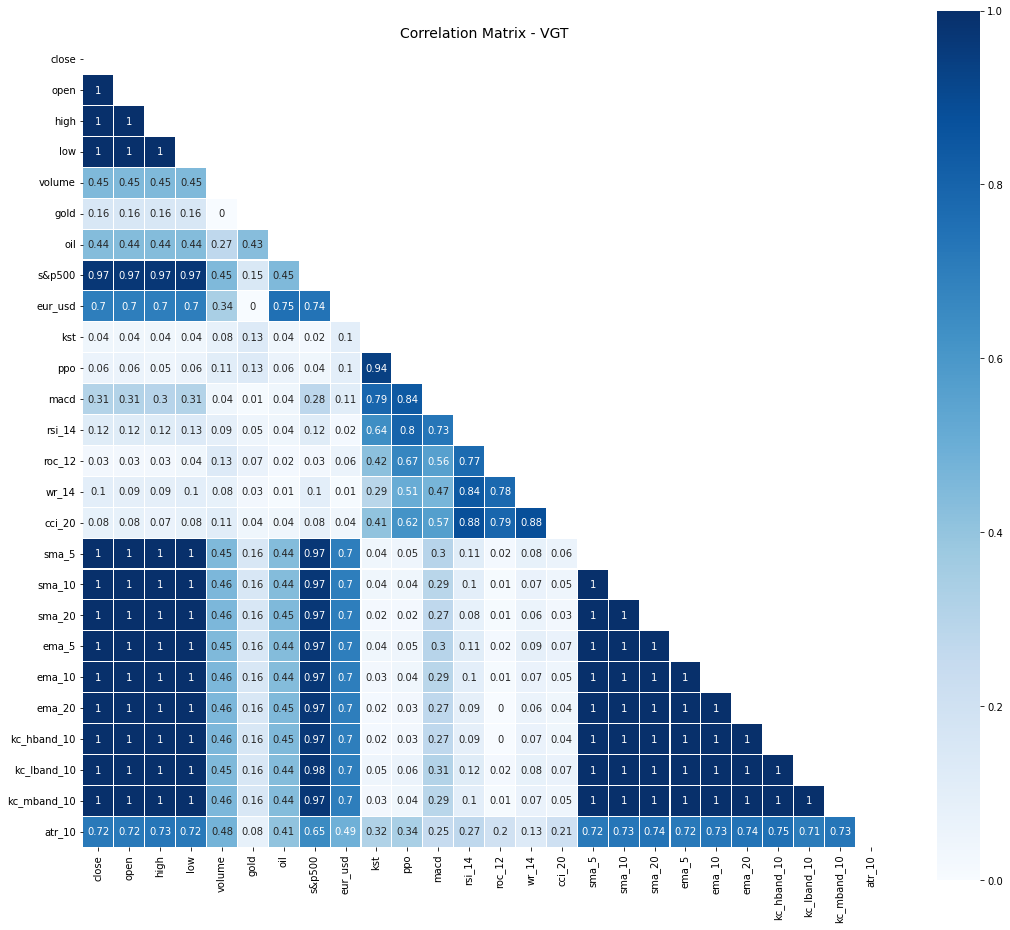

In [27]:
corr = round(pd.DataFrame(data_copy.drop("Y", axis=1)).corr().abs(), 2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18, 16))
color=sns.color_palette("Blues", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap=color, annot=True, square=True, linewidths=.1).set_title('Correlation Matrix - VGT', fontsize=14)

# Create Images

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
features=[i for i in range(X_train.shape[1])]
X_train=pd.DataFrame(X_train, columns=features)
X_test=pd.DataFrame(X_test, columns=features)

X_train_features = []
X_test_features = []
for i in features:
    X_train_features.append(pd.DataFrame(X_train[i]))
    X_train_features[i].rename(columns={i:0}, inplace=True)
    X_test_features.append(pd.DataFrame(X_test[i]))
    X_test_features[i].rename(columns={i:0}, inplace=True)

window=10
for f in features:    
    for i in range(1, window):
        X_train_features[f][i] = X_train_features[f][0].shift(+i)
        X_test_features[f][i] = X_test_features[f][0].shift(+i)
    
    X_train_features[f].dropna(inplace=True)
    X_test_features[f].dropna(inplace=True)

y_train=y_train[window-1:]
y_test=y_test[window-1:]

In [ ]:
np.array(X_train_features[0]).shape

(2204, 10)

In [ ]:
X_train_features[1]

,0,1,2,3,4,5,6,7,8,9
9,-0.342952,-0.361026,-0.465008,-0.468892,-0.541991,-0.517974,-0.554712,-0.551492,-0.410725,-0.270137
10,-0.247292,-0.342952,-0.361026,-0.465008,-0.468892,-0.541991,-0.517974,-0.554712,-0.551492,-0.410725
11,-0.222152,-0.247292,-0.342952,-0.361026,-0.465008,-0.468892,-0.541991,-0.517974,-0.554712,-0.551492
12,-0.128995,-0.222152,-0.247292,-0.342952,-0.361026,-0.465008,-0.468892,-0.541991,-0.517974,-0.554712
13,-0.133818,-0.128995,-0.222152,-0.247292,-0.342952,-0.361026,-0.465008,-0.468892,-0.541991,-0.517974
...,...,...,...,...,...,...,...,...,...,...
2208,-0.142788,-0.101303,-0.038186,-0.015535,0.065761,0.005811,0.061476,0.146485,0.183160,0.125815
2209,-0.075332,-0.142788,-0.101303,-0.038186,-0.015535,0.065761,0.005811,0.061476,0.146485,0.183160
2210,-0.116515,-0.075332,-0.142788,-0.101303,-0.038186,-0.015535,0.065761,0.005811,0.061476,0.146485
2211,-0.153311,-0.116515,-0.075332,-0.142788,-0.101303,-0.038186,-0.015535,0.065761,0.005811,0.061476


In [ ]:
X_train_gasf = []
X_test_gasf= []

X_train_gadf = []
X_test_gadf= []

X_train_mtf = []
X_test_mtf= []

for f in features:
    gasf = GramianAngularField(image_size=window, sample_range=(-1,1), method='summation')
    X_train_gasf.append(gasf.fit_transform(X_train_features[f]))
    X_test_gasf.append(gasf.transform(X_test_features[f]))
    
    gadf = GramianAngularField(image_size=window, sample_range=(-1,1), method='difference')
    X_train_gadf.append(gadf.fit_transform(X_train_features[f]))
    X_test_gadf.append(gadf.transform(X_test_features[f]))
    
    mtf = MarkovTransitionField(image_size=window, n_bins=3, strategy="quantile")
    X_train_mtf.append(mtf.fit_transform(X_train_features[f]))
    X_test_mtf.append(mtf.transform(X_test_features[f]))

print(np.array(X_train_gasf).shape) # features, datapoints, window-size, window-size 

a = X_train_gasf[5][4][3][2]

X_train_gasf = np.swapaxes(np.swapaxes(np.swapaxes(np.array(X_train_gasf),0,1), 1,2),2,3)
X_test_gasf = np.swapaxes(np.swapaxes(np.swapaxes(np.array(X_test_gasf),0,1), 1,2),2,3)

b = X_train_gasf[4][3][2][5]

print(a==b)

X_train_gadf = np.swapaxes(np.swapaxes(np.swapaxes(np.array(X_train_gadf),0,1), 1,2),2,3)
X_test_gadf = np.swapaxes(np.swapaxes(np.swapaxes(np.array(X_test_gadf),0,1), 1,2),2,3)

X_train_mtf = np.swapaxes(np.swapaxes(np.swapaxes(np.array(X_train_mtf),0,1), 1,2),2,3)
X_test_mtf = np.swapaxes(np.swapaxes(np.swapaxes(np.array(X_test_mtf),0,1), 1,2),2,3)

(11, 2204, 10, 10)
True


In [ ]:
np.array(X_train_gasf).shape

(2204, 10, 10, 11)

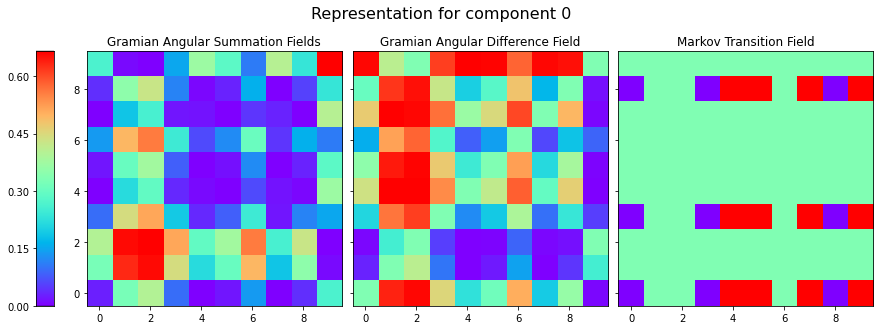

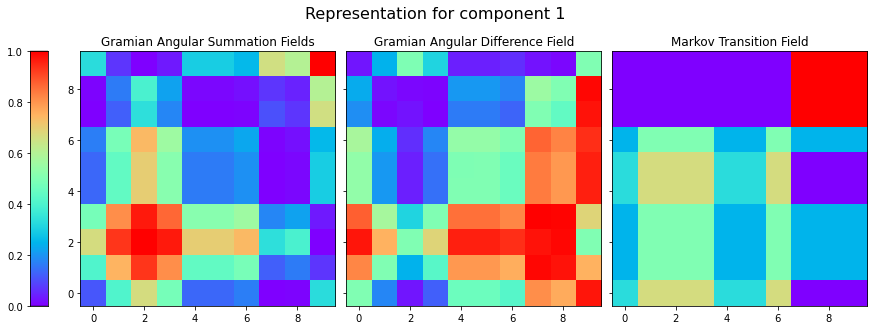

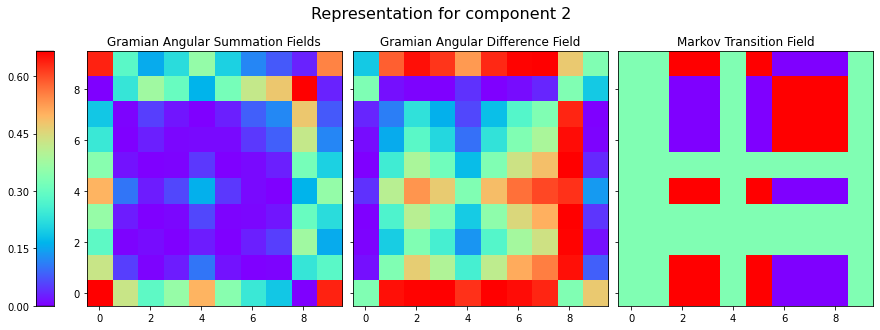

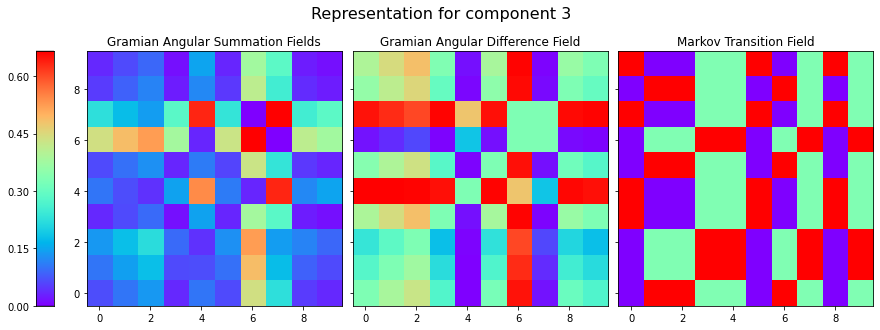

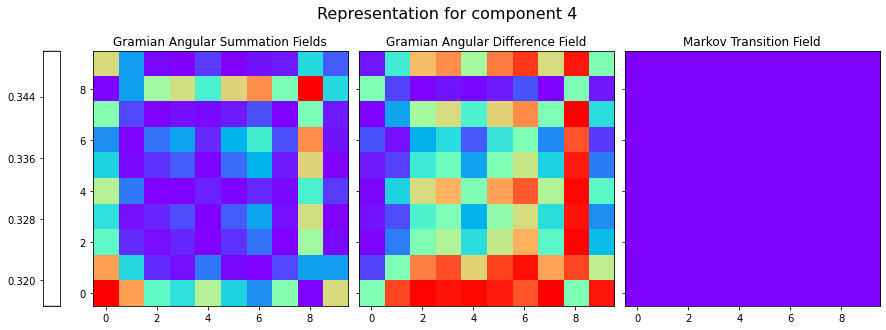

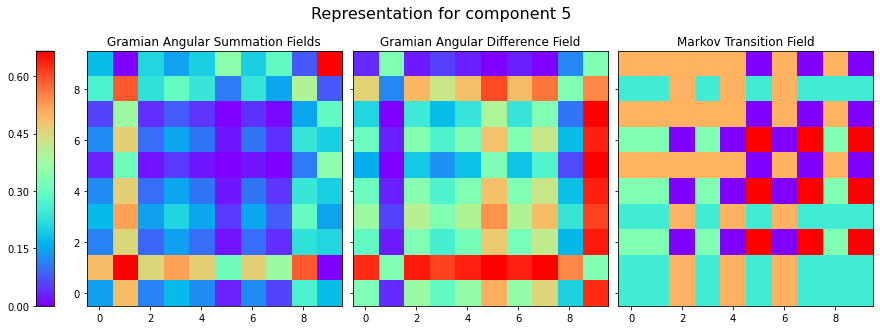

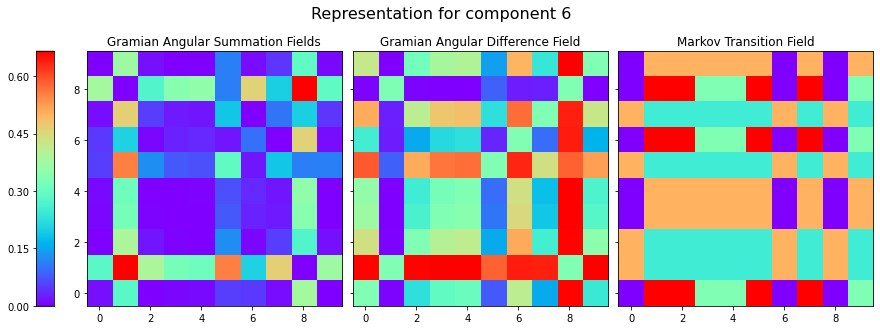

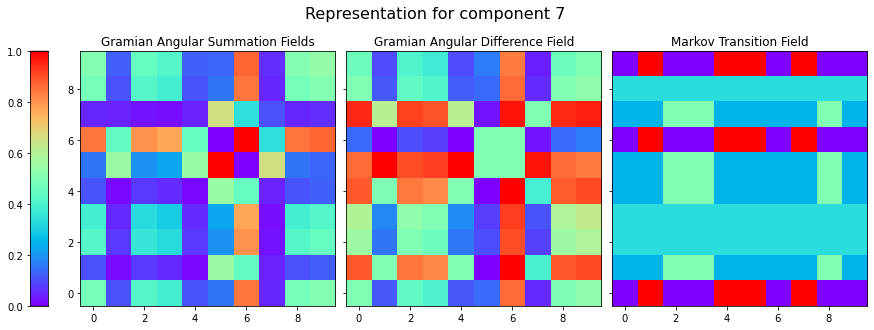

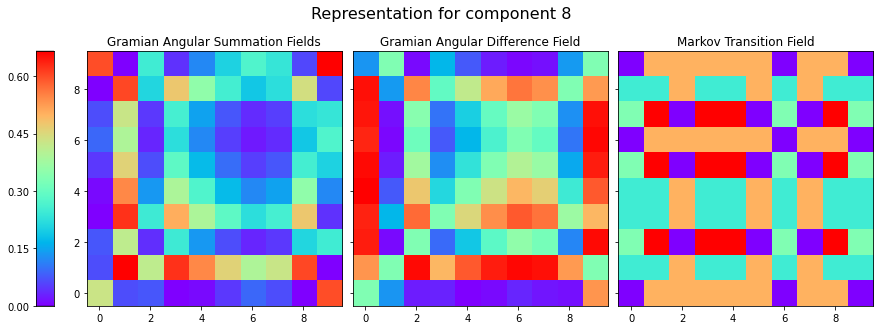

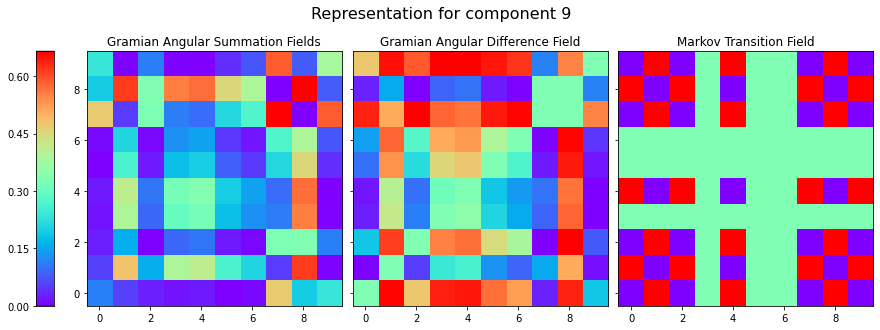

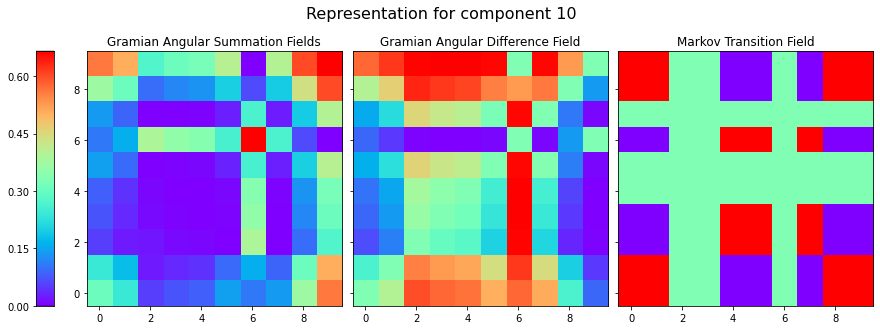

In [ ]:
utils.plot_gaf(gasf=X_train_gasf, gadf=X_train_gadf, mtf=X_train_mtf, datapoint=2000, features=features)#

# Model

## Parameters & Grid

In [ ]:
y_train=y_train+1
unique, counts = np.unique(y_train, return_counts=True)

print("Summary Train Set")
for cl in range(3):
    print("Class ", unique[cl], ": ", counts[cl], ", ", round(counts[cl]/sum(counts),4))
print("\n0.0 = SELL \n1.0 = BUY \n2.0 = HOLD")

Summary Train Set
Class  0 :  541 ,  0.2455
Class  1 :  1083 ,  0.4914
Class  2 :  580 ,  0.2632

0.0 = SELL 
1.0 = BUY 
2.0 = HOLD


In [ ]:
from sklearn.utils import class_weight

weights = class_weight.compute_class_weight('balanced',classes=(0,1,2), y = y_train)
weights = {i : weights[i] for i in range(3)}

In [ ]:
y_test = y_test+1
unique, counts = np.unique(y_test, return_counts=True)
print("Summary Test Set")
for cl in range(3):
    print("Class ", unique[cl], ": ", counts[cl], ", ", round(counts[cl]/sum(counts),4))
    
print("\n0.0 = SELL \n1.0 = BUY \n2.0 = HOLD")

Summary Test Set
Class  0 :  128 ,  0.2353
Class  1 :  273 ,  0.5018
Class  2 :  143 ,  0.2629

0.0 = SELL 
1.0 = BUY 
2.0 = HOLD


In [ ]:
def build_model2D_basic(train_X, train_y, val_X, val_Y,
                kernel, activation, padding, pooling, batch_normalization, drop_out, optimizer, learning_rate, batch_size, class_weight, epochs=200, val_data=True): # hyperparameter
    
    DefaultConv2D = partial(layers.Conv2D, kernel_size=kernel, activation=activation, padding=padding)
    
    model = models.Sequential()
    
   
    model.add(DefaultConv2D(filters=64, input_shape=(X_train_gadf[0].shape[0], X_train_gadf[0].shape[1], X_train_gadf[0].shape[2])))
    model.add(DefaultConv2D(filters=128))
    if pooling=="max":
        model.add(layers.MaxPooling2D((2,2)))
    elif pooling=="average":
        model.add(layers.AveragePooling2D((2,2)))

    if batch_normalization==True:
        model.add(layers.BatchNormalization())

    model.add(layers.Flatten())

    # hier nochmal drop_out als "Hyperparameter"?

    model.add(layers.Dense(256, activation=activation))
    #layers.Dense(128, activation="relu"),

    if drop_out != None: 
        model.add(layers.Dropout(drop_out))

    # Output layer
    layers.Dense(3, activation="softmax")

    if optimizer=="adam":
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer =="RMSprop":
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer=="SGD":
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])
    
    # es = EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=10)
    # mcp = ModelCheckpoint("best_model", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
    # es2 = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=10)
  
    if val_data == True: 
        model.fit(train_X, train_y, 
                   validation_data=(val_X, val_y ),
                   epochs=epochs, 
                   batch_size=batch_size,
                   class_weight=class_weight,
                   # callbacks=[es]
                ) 
    else:
        model.fit(train_X, train_y, 
                   epochs=epochs, 
                   batch_size=batch_size,
                   class_weight=class_weight,
                  # callbacks=[es2]
                ) 
   
    return model

In [ ]:
grid2={"kernel": [(3,3),(5,5)],
      "activation":["relu", "sigmoid", "softmax"],
      "padding": ["VALID", "SAME"],
      "pooling": ["max", "average"], 
      "batch_normalization": [True, False],
      "drop_out": [None, 0.25, 0.5],
      "epochs": [5, 10, 25, 50, 75, 100, 150],
      "batch_size": [16, 32, 64],
      "optimizer": ["RMSprop",  "Adam", "SGD"], 
      "learning_rate": [0.0001, 0.001, 0.01], 
       "class_weight": [weights, None]} # weights

keys, values = zip(*grid2.items())
permut_grid = [dict(zip(keys, v)) for v in itertools.product(*values)]

random.seed(12345) # 86
random.shuffle(permut_grid)

In [ ]:
val_iterations=3
validation_size=len(X_train_gadf)*0.2
train_split_start = np.array([0, validation_size, validation_size*2]).astype("int")
train_split_end = np.array([-3*validation_size, -2*validation_size, -1*validation_size]).astype("int") # also val split_start 
val_split_end = np.array([-2*validation_size, -1*validation_size, -1]).astype("int")

## GADF

### Train

In [ ]:
params={}
history_gadf = {}
for m in range(150):
    print(m)
    print("\nNew Model with Params", permut_grid[m])
    params[m]=permut_grid[m] 
    cv_history= []
    for cv in range(val_iterations):
      train_X = X_train_gadf[train_split_start[cv]:train_split_end[cv]]
      train_y = y_train[train_split_start[cv]:train_split_end[cv]]
      val_X = X_train_gadf[train_split_end[cv]:val_split_end[cv]]
      val_y = y_train[train_split_end[cv]:val_split_end[cv]]
        
      model_ =  build_model2D_basic(train_X, train_y, val_X, val_y,
                                kernel=permut_grid[m]["kernel"],
                                activation=permut_grid[m]["activation"],
                                padding=permut_grid[m]["padding"], 
                                pooling=permut_grid[m]["pooling"], 
                                batch_normalization=permut_grid[m]["batch_normalization"], 
                                drop_out=permut_grid[m]["drop_out"],
                                optimizer=permut_grid[m]["optimizer"],
                                learning_rate=permut_grid[m]["learning_rate"], 
                                epochs=permut_grid[m]["epochs"],  
                                batch_size=permut_grid[m]["batch_size"], 
                                class_weight=permut_grid[m]["class_weight"],
                                )        
      cv_history.append(model_.history.history)
    history_gadf[m]=cv_history

0

New Model with Params {'kernel': (3, 3), 'activation': 'softmax', 'padding': 'SAME', 'pooling': 'average', 'batch_normalization': True, 'drop_out': 0.5, 'epochs': 10, 'batch_size': 64, 'optimizer': 'Adam', 'learning_rate': 0.0001, 'class_weight': {0: 1.3579790511398644, 1: 0.6783625730994152, 2: 1.2666666666666666}}
Epoch 1/10
14/14 [==============================] - 2s 20ms/step - loss: 10.4160 - accuracy: 0.2902 - val_loss: 4.6683 - val_accuracy: 0.4694
Epoch 2/10
14/14 [==============================] - 0s 6ms/step - loss: 9.3403 - accuracy: 0.3356 - val_loss: 1.6138 - val_accuracy: 0.4694
Epoch 3/10
14/14 [==============================] - 0s 6ms/step - loss: 8.2007 - accuracy: 0.3197 - val_loss: 1.1018 - val_accuracy: 0.2608
Epoch 4/10
14/14 [==============================] - 0s 6ms/step - loss: 7.4788 - accuracy: 0.2687 - val_loss: 1.6897 - val_accuracy: 0.2608
Epoch 5/10
14/14 [==============================] - 0s 6ms/step - loss: 6.7943 - accuracy: 0.2585 - val_loss: 4.4941 

In [ ]:
text_file = open("/content/drive/MyDrive/Thesis/results/GADF_results_VGT.txt", "w")
text_file.write(
   """
    History: {}, 
    Grid Params: {} 
    """.format(history_gadf, params))
text_file.close()

### Results

In [ ]:
avg_cv_results_gadf = {}
for i in history_gadf.keys():
    loss = np.array([history_gadf[i][0]["loss"], history_gadf[i][1]["loss"], history_gadf[i][2]["loss"]]).mean(axis=0)
    accuracy = np.array([history_gadf[i][0]["accuracy"], history_gadf[i][1]["accuracy"], history_gadf[i][2]["accuracy"]]).mean(axis=0)
    val_loss = np.array([history_gadf[i][0]["val_loss"], history_gadf[i][1]["val_loss"], history_gadf[i][2]["val_loss"]]).mean(axis=0)
    val_accuracy = np.array([history_gadf[i][0]["val_accuracy"], history_gadf[i][1]["val_accuracy"], history_gadf[i][2]["val_accuracy"]]).mean(axis=0)
    avg_cv_results_gadf[i] = {"loss": loss,
                        "accuracy":accuracy,
                        "val_loss": val_loss, 
                        "val_accuracy": val_accuracy}

In [ ]:
best_val_acc_gadf = 0
best_params_gadf = 0
best_key_gadf = 0

for m in avg_cv_results_gadf.keys():

    if avg_cv_results_gadf[m]["val_accuracy"][-1] > best_val_acc_gadf and avg_cv_results_gadf[m]["val_accuracy"][-1]!=0.501204381386439:
        
        best_val_acc_gadf=avg_cv_results_gadf[m]["val_accuracy"][-1]
        best_params_gadf=params[m]
        best_key_gadf = m

In [ ]:
best_params_gadf

{'activation': 'softmax',
 'batch_normalization': True,
 'batch_size': 16,
 'class_weight': None,
 'drop_out': 0.25,
 'epochs': 150,
 'kernel': (3, 3),
 'learning_rate': 0.0001,
 'optimizer': 'RMSprop',
 'padding': 'VALID',
 'pooling': 'average'}

In [ ]:
best_val_acc_gadf

0.5011733869711558

In [ ]:
best_key_gadf # 0.501204381386439

78

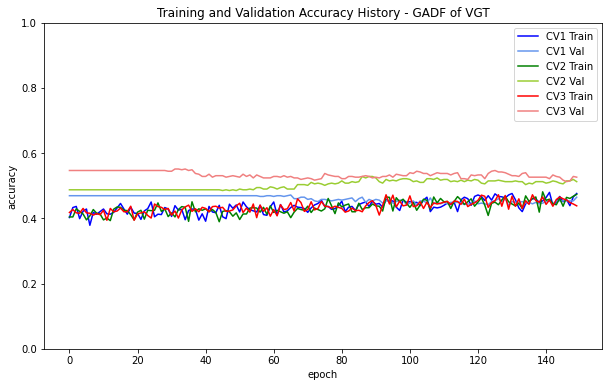

In [ ]:
# plot best history 
best_key_gadf=78

x=np.arange(best_params_gadf["epochs"])
plt.figure(figsize=(10, 6))

plt.plot(x, history_gadf[best_key_gadf][0]["accuracy"], color="b")
plt.plot(x, history_gadf[best_key_gadf][0]["val_accuracy"], color="cornflowerblue")
plt.plot(x, history_gadf[best_key_gadf][1]["accuracy"], color="g")
plt.plot(x, history_gadf[best_key_gadf][1]["val_accuracy"], "yellowgreen")
plt.plot(x, history_gadf[best_key_gadf][2]["accuracy"], color="r")
plt.plot(x, history_gadf[best_key_gadf][2]["val_accuracy"], color="lightcoral")
plt.legend(["CV1 Train", "CV1 Val", "CV2 Train", "CV2 Val", "CV3 Train", "CV3 Val"], loc="upper right")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Training and Validation Accuracy History - GADF of VGT")
plt.ylim(0,1)
plt.show()

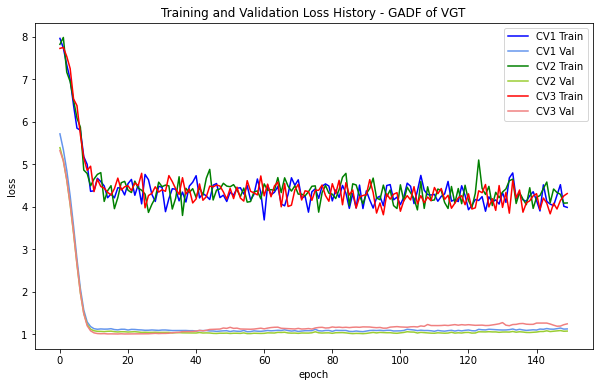

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, history_gadf[best_key_gadf][0]["loss"], color="b")
plt.plot(x, history_gadf[best_key_gadf][0]["val_loss"], color="cornflowerblue")
plt.plot(x, history_gadf[best_key_gadf][1]["loss"], color="g")
plt.plot(x, history_gadf[best_key_gadf][1]["val_loss"], "yellowgreen")
plt.plot(x, history_gadf[best_key_gadf][2]["loss"], color="r")
plt.plot(x, history_gadf[best_key_gadf][2]["val_loss"], color="lightcoral")
plt.legend(["CV1 Train", "CV1 Val", "CV2 Train", "CV2 Val", "CV3 Train", "CV3 Val"], loc="upper right")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Training and Validation Loss History - GADF of VGT")
plt.show()

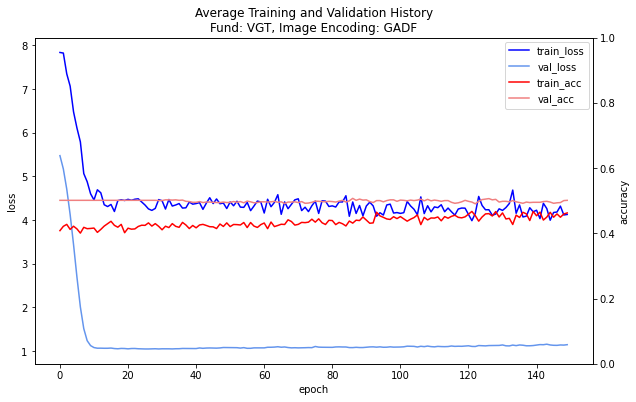

<Figure size 432x288 with 0 Axes>

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(x, avg_cv_results_gadf[best_key_gadf]["loss"], color="b", label="train_loss")
ax.plot(x, avg_cv_results_gadf[best_key_gadf]["val_loss"], color="cornflowerblue", label="val_loss")# set x-axis label
ax.set_xlabel("epoch",fontsize=10)
ax.set_ylabel("loss",fontsize=10)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x, avg_cv_results_gadf[best_key_gadf]["accuracy"], color="r", label="train_acc")
ax2.plot(x, avg_cv_results_gadf[best_key_gadf]["val_accuracy"], color="lightcoral", label="val_acc")
ax2.set_ylim((0,1))
ax2.set_ylabel("accuracy",fontsize=10)
fig.legend(loc='upper right', bbox_to_anchor=(0.325, 0.345, 0.5, 0.5))
plt.title("Average Training and Validation History\nFund: VGT, Image Encoding: GADF")
plt.show()

plt.savefig("/content/drive/MyDrive/Thesis/results/history_vgt_gadf")

In [ ]:
val_X=1
val_y=2

best_model_gadf =  build_model2D_basic(X_train_gadf, y_train, val_X, val_y,
                        kernel=best_params_gadf["kernel"],
                        activation=best_params_gadf["activation"],
                        padding=best_params_gadf["padding"], 
                        pooling=best_params_gadf["pooling"], 
                        batch_normalization=best_params_gadf["batch_normalization"], 
                        drop_out=best_params_gadf["drop_out"],
                        optimizer=best_params_gadf["optimizer"],
                        learning_rate=best_params_gadf["learning_rate"], 
                        epochs=best_params_gadf["epochs"],  
                        batch_size=best_params_gadf["batch_size"], 
                        class_weight=best_params_gadf["class_weight"],
                        val_data=False)

In [ ]:
tf.keras.models.save_model(best_model_gadf, filepath="/content/drive/MyDrive/Thesis/Code/Model/CodeCode/Colab5/BESTMODEL_VGT_GADF")  
# best_model_gadf = load_model("/content/drive/MyDrive/Thesis/results/BESTMODEL_VGT_GADF") # predicts all 3 classes but for sell only wring, but financial evaluation

In [ ]:
_, train_acc_ = best_model_gadf.evaluate(X_train_gadf, y_train, verbose=0)
_, test_acc = best_model_gadf.evaluate(X_test_gadf, y_test, verbose=0)

print("train_acc",train_acc_)
print("\ntest_acc",test_acc)

predict_train = best_model_gadf.predict(X_train_gadf)
predictions_train=np.argmax(predict_train,axis=1)

predict_test = best_model_gadf.predict(X_test_gadf)
predictions_test=np.argmax(predict_test,axis=1)

print("\nClassification Report Train Set")
print(classification_report(y_train, predictions_train, digits=4))

print("\nClassification Report Test Set")
print(classification_report(y_test, predictions_test, digits=4))

train_acc 0.5530853271484375

test_acc 0.5055146813392639

Classification Report Train Set
              precision    recall  f1-score   support

           0     0.5413    0.1091    0.1815       541
           1     0.5743    0.8846    0.6965      1083
           2     0.4731    0.3483    0.4012       580

    accuracy                         0.5531      2204
   macro avg     0.5296    0.4473    0.4264      2204
weighted avg     0.5396    0.5531    0.4924      2204


Classification Report Test Set
              precision    recall  f1-score   support

           0     0.3750    0.0469    0.0833       128
           1     0.5372    0.8718    0.6648       273
           2     0.3647    0.2168    0.2719       143

    accuracy                         0.5055       544
   macro avg     0.4257    0.3785    0.3400       544
weighted avg     0.4537    0.5055    0.4247       544



In [ ]:
df_confusion = pd.crosstab(y_test, predictions_test, colnames=["prediction"], rownames=["true value"])
print(df_confusion)

prediction  0    1   2
true value            
0           6   94  28
1           9  238  26
2           1  111  31


In [ ]:
predictions_train=predictions_train-1
financial_performance_model_short(data_copy[10:len(predictions_train)+10], predictions_train)

Day 0: purchase of 298.63 units for total of 9995 euros

Day 31:
Total sale:358.36 units for total of 11215.25 euros
Closed long position: 298.63 units
New short position: 59.73 units

Day 33:
Short position closed: repurchase of 59.73 shares.
Long position built: 312.7 units. Total value: 9412.38 euros

Day 49:
Total sale:375.24 units for total of 12989.56 euros
Closed long position: 312.7 units
New short position: 62.54 units

Day 63:
Short position closed: repurchase of 62.54 shares.
Long position built: 284.83 units. Total value: 10646.82 euros

Day 145:
Total sale:341.8 units for total of 16008.33 euros
Closed long position: 284.83 units
New short position: 56.97 units

Day 146:
Short position closed: repurchase of 56.97 shares.
Long position built: 293.83 units. Total value: 13404.36 euros

Day 171:
Total sale:352.6 units for total of 17748.41 euros
Closed long position: 293.83 units
New short position: 58.77 units

Day 174:
Short position closed: repurchase of 58.77 shares.
Long

In [ ]:
from financial_eval import financial_performance_model_short

predictions_test=predictions_test-1
financial_performance_model_short(data_copy[-len(predictions_test):], predictions_test)

Day 0: purchase of 61.26 units for total of 9995 euros

Day 7:
Total sale:73.51 units for total of 12109.45 euros
Closed long position: 61.26 units
New short position: 12.25 units

Day 8:
Short position closed: repurchase of 12.25 shares.
Long position built: 61.21 units. Total value: 10086.02 euros

Day 12:
Total sale:73.45 units for total of 12087.81 euros
Closed long position: 61.21 units
New short position: 12.24 units

Day 13:
Short position closed: repurchase of 12.24 shares.
Long position built: 60.89 units. Total value: 10060.52 euros

Day 19:
Total sale:73.07 units for total of 11952.91 euros
Closed long position: 60.89 units
New short position: 12.18 units

Day 20:
Short position closed: repurchase of 12.18 shares.
Long position built: 60.23 units. Total value: 9938.08 euros

Day 150:
Total sale:72.28 units for total of 13574.97 euros
Closed long position: 60.23 units
New short position: 12.05 units

Day 156:
Short position closed: repurchase of 12.05 shares.
Long position bu

## GASF


### Train

In [ ]:
random.seed(22)
random.shuffle(permut_grid)

params = {}
history_gasf = {}
for m in range(150):
    print(m)
    print("\nNew Model with Params", permut_grid[m] )
    cv_history= []
    params[m]=permut_grid[m] 
    for cv in range(val_iterations):
       train_X = X_train_gasf[train_split_start[cv]:train_split_end[cv]]
       train_y = y_train[train_split_start[cv]:train_split_end[cv]]
       val_X = X_train_gasf[train_split_end[cv]:val_split_end[cv]]
       val_y = y_train[train_split_end[cv]:val_split_end[cv]]
        
       model_ =  build_model2D_basic(train_X, train_y, val_X, val_y,
                                kernel=permut_grid[m]["kernel"],
                                activation=permut_grid[m]["activation"],
                                padding=permut_grid[m]["padding"], 
                                pooling=permut_grid[m]["pooling"], 
                                batch_normalization=permut_grid[m]["batch_normalization"], 
                                drop_out=permut_grid[m]["drop_out"],
                                optimizer=permut_grid[m]["optimizer"],
                                learning_rate=permut_grid[m]["learning_rate"], 
                                epochs=permut_grid[m]["epochs"],  
                                batch_size=permut_grid[m]["batch_size"], 
                                class_weight=permut_grid[m]["class_weight"],

                                )        
       cv_history.append(model_.history.history)
    history_gasf[m]=cv_history

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
Epoch 14/50
56/56 [==============================] - 0s 4ms/step - loss: 7.5280 - accuracy: 0.3095 - val_loss: 5.3426 - val_accuracy: 0.2608
Epoch 15/50
56/56 [==============================] - 0s 5ms/step - loss: 8.0369 - accuracy: 0.2914 - val_loss: 5.3279 - val_accuracy: 0.2608
Epoch 16/50
56/56 [==============================] - 0s 5ms/step - loss: 7.9244 - accuracy: 0.2948 - val_loss: 5.3133 - val_accuracy: 0.2608
Epoch 17/50
56/56 [==============================] - 0s 4ms/step - loss: 7.8415 - accuracy: 0.2902 - val_loss: 5.2986 - val_accuracy: 0.2608
Epoch 18/50
56/56 [==============================] - 0s 4ms/step - loss: 7.9281 - accuracy: 0.2925 - val_loss: 5.2841 - val_accuracy: 0.2608
Epoch 19/50
56/56 [==============================] - 0s 4ms/step - loss: 7.7515 - accuracy: 0.2834 - val_loss: 5.2693 - val_accuracy: 0.2608
Epoch 20/50
56/56 [==============================] - 0s 5ms/step - loss: 7.6907 - accur

In [ ]:
text_file = open("/content/drive/MyDrive/Thesis/results/GASF_results_VGT.txt", "w")
text_file.write(
    """
    History: {}, 
    Grid Params: {} 
    
    """.format(history_gasf, params))
text_file.close()

In [ ]:
avg_cv_results_gasf = {}
for i in history_gasf.keys():
    loss = np.array([history_gasf[i][0]["loss"], history_gasf[i][1]["loss"], history_gasf[i][2]["loss"]]).mean(axis=0)
    accuracy = np.array([history_gasf[i][0]["accuracy"], history_gasf[i][1]["accuracy"], history_gasf[i][2]["accuracy"]]).mean(axis=0)
    val_loss = np.array([history_gasf[i][0]["val_loss"], history_gasf[i][1]["val_loss"], history_gasf[i][2]["val_loss"]]).mean(axis=0)
    val_accuracy = np.array([history_gasf[i][0]["val_accuracy"], history_gasf[i][1]["val_accuracy"], history_gasf[i][2]["val_accuracy"]]).mean(axis=0)
    avg_cv_results_gasf[i] = {"loss": loss,
                        "accuracy":accuracy,
                        "val_loss": val_loss, 
                        "val_accuracy": val_accuracy}

In [ ]:
best_val_acc_gasf = 0
best_params_gasf = 0
best_key_gasf = 0

for m in avg_cv_results_gasf.keys():
    if avg_cv_results_gasf[m]["val_accuracy"][-1] > best_val_acc_gasf and avg_cv_results_gasf[m]["val_accuracy"][-1]!=0.501204381386439:
        
        best_val_acc_gasf=avg_cv_results_gasf[m]["val_accuracy"][-1]
        best_params_gasf=params[m]
        best_key_gasf = m

### Results

In [ ]:
best_params_gasf

{'activation': 'sigmoid',
 'batch_normalization': True,
 'batch_size': 16,
 'class_weight': None,
 'drop_out': None,
 'epochs': 10,
 'kernel': (3, 3),
 'learning_rate': 0.001,
 'optimizer': 'SGD',
 'padding': 'VALID',
 'pooling': 'max'}

In [ ]:
best_val_acc_gasf

0.4992501469453176

In [ ]:
best_key_gasf

120

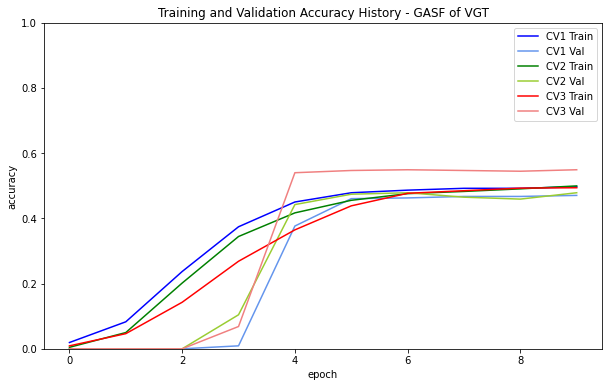

In [ ]:
# plot best history 
x=np.arange(best_params_gasf["epochs"])
plt.figure(figsize=(10, 6))

plt.plot(x, history_gasf[best_key_gasf][0]["accuracy"], color="b")
plt.plot(x, history_gasf[best_key_gasf][0]["val_accuracy"], color="cornflowerblue")
plt.plot(x, history_gasf[best_key_gasf][1]["accuracy"], color="g")
plt.plot(x, history_gasf[best_key_gasf][1]["val_accuracy"], "yellowgreen")
plt.plot(x, history_gasf[best_key_gasf][2]["accuracy"], color="r")
plt.plot(x, history_gasf[best_key_gasf][2]["val_accuracy"], color="lightcoral")
plt.legend(["CV1 Train", "CV1 Val", "CV2 Train", "CV2 Val", "CV3 Train", "CV3 Val"], loc="upper right")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Training and Validation Accuracy History - GASF of VGT")
plt.ylim(0,1)
plt.show()

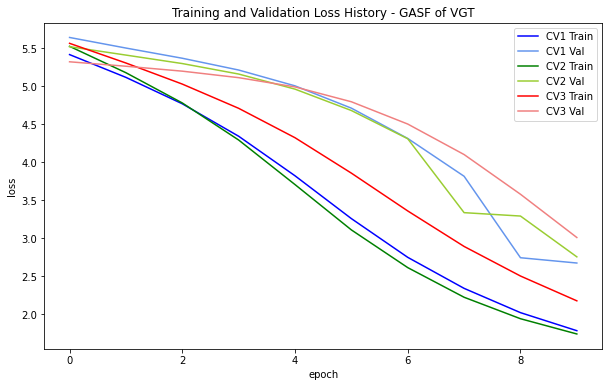

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(x, history_gasf[best_key_gasf][0]["loss"], color="b")
plt.plot(x, history_gasf[best_key_gasf][0]["val_loss"], color="cornflowerblue")
plt.plot(x, history_gasf[best_key_gasf][1]["loss"], color="g")
plt.plot(x, history_gasf[best_key_gasf][1]["val_loss"], "yellowgreen")
plt.plot(x, history_gasf[best_key_gasf][2]["loss"], color="r")
plt.plot(x, history_gasf[best_key_gasf][2]["val_loss"], color="lightcoral")
plt.legend(["CV1 Train", "CV1 Val", "CV2 Train", "CV2 Val", "CV3 Train", "CV3 Val"], loc="upper right")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Training and Validation Loss History - GASF of VGT")
plt.show()

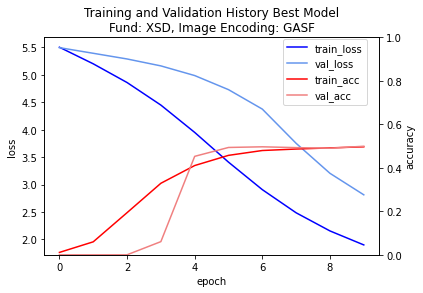

<Figure size 432x288 with 0 Axes>

In [ ]:
fig,ax = plt.subplots()
ax.plot(x, avg_cv_results_gasf[best_key_gasf]["loss"], color="b", label="train_loss")
ax.plot(x, avg_cv_results_gasf[best_key_gasf]["val_loss"], color="cornflowerblue", label="val_loss")# set x-axis label
ax.set_xlabel("epoch",fontsize=10)
ax.set_ylabel("loss",fontsize=10)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x, avg_cv_results_gasf[best_key_gasf]["accuracy"], color="r", label="train_acc")
ax2.plot(x, avg_cv_results_gasf[best_key_gasf]["val_accuracy"], color="lightcoral", label="val_acc")
ax2.set_ylim((0,1))
ax2.set_ylabel("accuracy",fontsize=10)
fig.legend(loc='upper right', bbox_to_anchor=(0.36, 0.4, 0.5, 0.5))
plt.title("Training and Validation History Best Model\nFund: XSD, Image Encoding: GASF")
plt.show()

plt.savefig("/content/drive/MyDrive/Thesis/results/history_vgt_gasf")

In [ ]:
val_X=1
val_y=2

best_model_gasf = build_model2D_basic(X_train_gasf, y_train, val_X, val_y,
                          kernel=best_params_gasf["kernel"],
                          activation=best_params_gasf["activation"],
                          padding=best_params_gasf["padding"], 
                          pooling=best_params_gasf["pooling"], 
                          batch_normalization=best_params_gasf["batch_normalization"], 
                          drop_out=best_params_gasf["drop_out"],
                          optimizer=best_params_gasf["optimizer"],
                          learning_rate=best_params_gasf["learning_rate"], 
                          epochs=24, #best_params_gasf["epochs"],  
                          batch_size=best_params_gasf["batch_size"], 
                          class_weight=best_params_gasf["class_weight"],
                          val_data=False)

Epoch 1/24
138/138 [==============================] - 9s 3ms/step - loss: 5.3364 - accuracy: 0.0408
Epoch 2/24
138/138 [==============================] - 0s 3ms/step - loss: 4.4209 - accuracy: 0.3380
Epoch 3/24
138/138 [==============================] - 0s 3ms/step - loss: 3.1385 - accuracy: 0.4705
Epoch 4/24
138/138 [==============================] - 0s 3ms/step - loss: 2.1749 - accuracy: 0.4773
Epoch 5/24
138/138 [==============================] - 0s 3ms/step - loss: 1.6788 - accuracy: 0.4773
Epoch 6/24
138/138 [==============================] - 0s 3ms/step - loss: 1.4465 - accuracy: 0.4805
Epoch 7/24
138/138 [==============================] - 0s 3ms/step - loss: 1.3222 - accuracy: 0.4864
Epoch 8/24
138/138 [==============================] - 0s 3ms/step - loss: 1.2457 - accuracy: 0.4982
Epoch 9/24
138/138 [==============================] - 0s 3ms/step - loss: 1.1921 - accuracy: 0.5032
Epoch 10/24
138/138 [==============================] - 0s 3ms/step - loss: 1.1532 - accuracy: 0.5095

In [ ]:
# tf.keras.models.save_model(best_model_gasf, filepath="/content/drive/MyDrive/Thesis/results/BESTMODEL_VGT_GASF")  
best_model_gasf= load_model("/content/drive/MyDrive/Thesis/results/BESTMODEL_VGT_GASF")

In [ ]:
_, train_acc_ = best_model_gasf.evaluate(X_train_gasf, y_train, verbose=0)
_, test_acc = best_model_gasf.evaluate(X_test_gasf, y_test, verbose=0)

print("train_acc",train_acc_)
print("\ntest_acc",test_acc)

predict_train = best_model_gasf.predict(X_train_gasf)
predictions_train=np.argmax(predict_train,axis=1)

predict_test = best_model_gasf.predict(X_test_gasf)
predictions_test=np.argmax(predict_test,axis=1)

print("\nMacro Average Train",  round(f1_score(y_train,predictions_train, average="macro"),4))
print("Macro Average Test",  round(f1_score(y_test,predictions_test, average="macro"),4))

print("\nWeighted Average Train",  round(f1_score(y_train,predictions_train, average="weighted"),4))
print("Weighted Average Test",  round(f1_score(y_test,predictions_test, average="weighted"),4))

print("\nClassification Report Train Set")
print(classification_report(y_train, predictions_train, digits=4))

print("\nClassification Report Test Set")
print(classification_report(y_test, predictions_test, digits=4))

train_acc 0.5322141647338867

test_acc 0.49264705181121826

Macro Average Train 0.1571
Macro Average Test 0.2351

Weighted Average Train 0.4411
Weighted Average Test 0.3994

Classification Report Train Set
              precision    recall  f1-score   support

           0     0.4828    0.1294    0.2041       541
           1     0.5314    0.9455    0.6804      1083
           2     0.6032    0.1310    0.2153       580
          34     0.0000    0.0000    0.0000         0
          36     0.0000    0.0000    0.0000         0
         208     0.0000    0.0000    0.0000         0
         210     0.0000    0.0000    0.0000         0

    accuracy                         0.5309      2204
   macro avg     0.2310    0.1723    0.1571      2204
weighted avg     0.5383    0.5309    0.4411      2204


Classification Report Test Set
              precision    recall  f1-score   support

           0     0.2667    0.0625    0.1013       128
           1     0.5139    0.8791    0.6486       273
  

In [ ]:
df_confusion = pd.crosstab(y_test, predictions_test, colnames=["prediction"], rownames=["true value"])
print(df_confusion)

prediction  0    1    2    108
true value                    
0             8  112    8    0
1            12  240   20    1
2            10  115   18    0


In [ ]:
from financial_eval import financial_performance_model_short

predictions_train=predictions_train-1
financial_performance_model_short(data_copy[10:len(predictions_train)+10], predictions_train)

Day 0: purchase of 298.63 units for total of 9995 euros

Day 1:
Total sale:358.36 units for total of 11365.76 euros
Closed long position: 298.63 units
New short position: 59.73 units

Day 6:
Short position closed: repurchase of 59.73 shares.
Long position built: 276.19 units. Total value: 9340.69 euros

Day 19:
Total sale:331.43 units for total of 11568.54 euros
Closed long position: 276.19 units
New short position: 55.24 units

Day 51:
Short position closed: repurchase of 55.24 shares.
Long position built: 265.79 units. Total value: 9573.79 euros

Day 62:
Total sale:318.95 units for total of 12303.28 euros
Closed long position: 265.79 units
New short position: 53.16 units

Day 117:
Short position closed: repurchase of 53.16 shares.
Long position built: 249.53 units. Total value: 10138.39 euros

Day 157:
Total sale:299.44 units for total of 13966.87 euros
Closed long position: 249.53 units
New short position: 49.91 units

Day 177:
Short position closed: repurchase of 49.91 shares.
Long

In [ ]:
predictions_test=predictions_test-1
financial_performance_model_short(data_copy[-len(predictions_test):], predictions_test)

Day 1: purchase of 61.21 units for total of 9995 euros

Day 104:
Total sale:73.45 units for total of 12527.04 euros
Closed long position: 61.21 units
New short position: 12.24 units

Day 107:
Short position closed: repurchase of 12.24 shares.
Long position built: 62.15 units. Total value: 10461.56 euros

Day 132:
Total sale:74.58 units for total of 13631.21 euros
Closed long position: 62.15 units
New short position: 12.43 units

Day 143:
Short position closed: repurchase of 12.43 shares.
Long position built: 61.95 units. Total value: 11349.03 euros

Day 159:
Total sale:74.34 units for total of 13886.17 euros
Closed long position: 61.95 units
New short position: 12.39 units

Day 161:
Short position closed: repurchase of 12.39 shares.
Long position built: 64.06 units. Total value: 11631.52 euros

Day 162:
Total sale:76.87 units for total of 14026.08 euros
Closed long position: 64.06 units
New short position: 12.81 units

Day 170:
Short position closed: repurchase of 12.81 shares.
Long po

## MTF 

### Train

In [ ]:
params={}
history_mtf = {}
for m in range(500):
    print(m)
    print("\nNew Model with Params", permut_grid[m] )
    cv_history= []
    params[m]=permut_grid[m] 
    for cv in range(val_iterations):
       train_X = X_train_mtf[train_split_start[cv]:train_split_end[cv]]
       train_y = y_train[train_split_start[cv]:train_split_end[cv]]
       val_X = X_train_mtf[train_split_end[cv]:val_split_end[cv]]
       val_y = y_train[train_split_end[cv]:val_split_end[cv]]
        
       model_ =  build_model2D_basic(train_X, train_y, val_X, val_y,
                                kernel=permut_grid[m]["kernel"],
                                activation=permut_grid[m]["activation"],
                                padding=permut_grid[m]["padding"], 
                                pooling=permut_grid[m]["pooling"], 
                                batch_normalization=permut_grid[m]["batch_normalization"], 
                                drop_out=permut_grid[m]["drop_out"],
                                optimizer=permut_grid[m]["optimizer"],
                                learning_rate=permut_grid[m]["learning_rate"], 
                                epochs=permut_grid[m]["epochs"],  
                                batch_size=permut_grid[m]["batch_size"], 
                                class_weight=permut_grid[m]["class_weight"],
                                )        
       cv_history.append(model_.history.history)
    history_mtf[m]=cv_history

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
28/28 [==============================] - 0s 5ms/step - loss: 8.7657 - accuracy: 0.3545 - val_loss: 4.7866 - val_accuracy: 0.4875
Epoch 60/100
28/28 [==============================] - 0s 5ms/step - loss: 8.7352 - accuracy: 0.3726 - val_loss: 4.7866 - val_accuracy: 0.4875
Epoch 61/100
28/28 [==============================] - 0s 5ms/step - loss: 9.0909 - accuracy: 0.3431 - val_loss: 4.7866 - val_accuracy: 0.4875
Epoch 62/100
28/28 [==============================] - 0s 5ms/step - loss: 8.9099 - accuracy: 0.3635 - val_loss: 4.7866 - val_accuracy: 0.4875
Epoch 63/100
28/28 [==============================] - 0s 5ms/step - loss: 8.4896 - accuracy: 0.3613 - val_loss: 4.7866 - val_accuracy: 0.4875
Epoch 64/100
28/28 [==============================] - 0s 5ms/step - loss: 8.5163 - accuracy: 0.3851 - val_loss: 4.7866 - val_accuracy: 0.4875
Epoch 65/100
28/28 [==============================] - 0s 5ms/step - loss: 8.9272 - accuracy: 0

In [ ]:
text_file = open("/content/drive/MyDrive/Thesis/results//MTF_results_VGT.txt", "w")
text_file.write(
    """
    History: {}, 
    Grid Params: {} 
    """.format(history_mtf, params))
text_file.close()

### Results

In [ ]:
avg_cv_results_mtf = {}
for i in history_mtf.keys():
  
    loss = np.array([history_mtf[i][0]["loss"], history_mtf[i][1]["loss"], history_mtf[i][2]["loss"]]).mean(axis=0)
    accuracy = np.array([history_mtf[i][0]["accuracy"], history_mtf[i][1]["accuracy"], history_mtf[i][2]["accuracy"]]).mean(axis=0)
    val_loss = np.array([history_mtf[i][0]["val_loss"], history_mtf[i][1]["val_loss"], history_mtf[i][2]["val_loss"]]).mean(axis=0)
    val_accuracy = np.array([history_mtf[i][0]["val_accuracy"], history_mtf[i][1]["val_accuracy"], history_mtf[i][2]["val_accuracy"]]).mean(axis=0)
    avg_cv_results_mtf[i] = {"loss": loss,
                        "accuracy":accuracy,
                        "val_loss": val_loss, 
                        "val_accuracy": val_accuracy}

In [ ]:
best_val_acc_mtf = 0
best_params_mtf = 0
best_key_mtf = 0

for m in avg_cv_results_mtf.keys():
    if avg_cv_results_mtf[m]["val_accuracy"][-1] > best_val_acc_mtf and avg_cv_results_mtf[m]["val_accuracy"][-1] != 0.501204381386439:
        best_val_acc_mtf=avg_cv_results_mtf[m]["val_accuracy"][-1]
        best_params_mtf=params[m]
        best_key_mtf = m

In [ ]:
best_params_mtf

{'activation': 'softmax',
 'batch_normalization': True,
 'batch_size': 16,
 'class_weight': None,
 'drop_out': 0.25,
 'epochs': 100,
 'kernel': (5, 5),
 'learning_rate': 0.0001,
 'optimizer': 'RMSprop',
 'padding': 'SAME',
 'pooling': 'average'}

In [ ]:
best_val_acc_mtf # 0.501204381386439

0.49134378631909686

In [ ]:
best_key_mtf

387

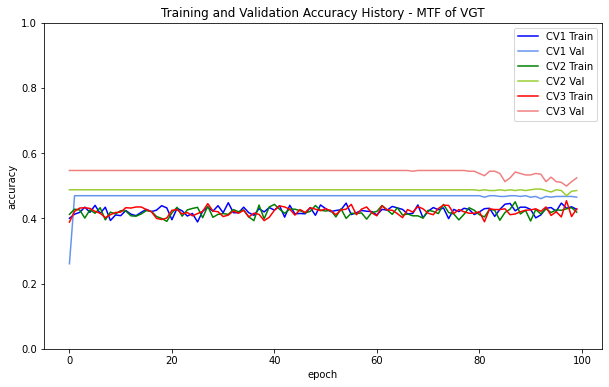

In [ ]:
# plot best history 
x=np.arange(best_params_mtf["epochs"])
plt.figure(figsize=(10, 6))

plt.plot(x, history_mtf[best_key_mtf][0]["accuracy"], color="b")
plt.plot(x, history_mtf[best_key_mtf][0]["val_accuracy"], color="cornflowerblue")
plt.plot(x, history_mtf[best_key_mtf][1]["accuracy"], color="g")
plt.plot(x, history_mtf[best_key_mtf][1]["val_accuracy"], "yellowgreen")
plt.plot(x, history_mtf[best_key_mtf][2]["accuracy"], color="r")
plt.plot(x, history_mtf[best_key_mtf][2]["val_accuracy"], color="lightcoral")
plt.legend(["CV1 Train", "CV1 Val", "CV2 Train", "CV2 Val", "CV3 Train", "CV3 Val"], loc="upper right")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Training and Validation Accuracy History - MTF of VGT")
plt.ylim(0,1)
plt.show()

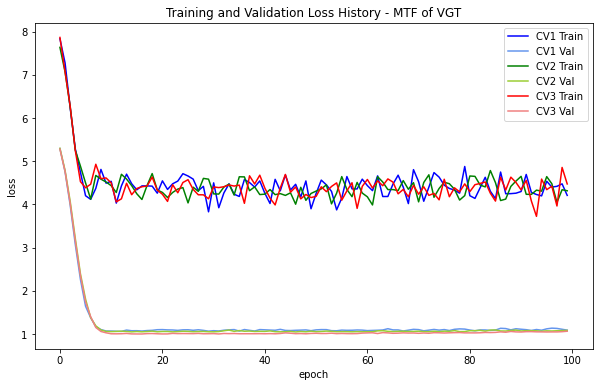

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(x, history_mtf[best_key_mtf][0]["loss"], color="b")
plt.plot(x, history_mtf[best_key_mtf][0]["val_loss"], color="cornflowerblue")
plt.plot(x, history_mtf[best_key_mtf][1]["loss"], color="g")
plt.plot(x, history_mtf[best_key_mtf][1]["val_loss"], "yellowgreen")
plt.plot(x, history_mtf[best_key_mtf][2]["loss"], color="r")
plt.plot(x, history_mtf[best_key_mtf][2]["val_loss"], color="lightcoral")
plt.legend(["CV1 Train", "CV1 Val", "CV2 Train", "CV2 Val", "CV3 Train", "CV3 Val"], loc="upper right")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Training and Validation Loss History - MTF of VGT")
plt.show()

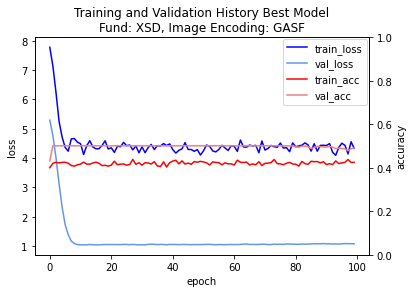

<Figure size 432x288 with 0 Axes>

In [ ]:
fig,ax = plt.subplots()
ax.plot(x, avg_cv_results_mtf[best_key_mtf]["loss"], color="b", label="train_loss")
ax.plot(x, avg_cv_results_mtf[best_key_mtf]["val_loss"], color="cornflowerblue", label="val_loss")# set x-axis label
ax.set_xlabel("epoch",fontsize=10)
ax.set_ylabel("loss",fontsize=10)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x, avg_cv_results_mtf[best_key_mtf]["accuracy"], color="r", label="train_acc")
ax2.plot(x, avg_cv_results_mtf[best_key_mtf]["val_accuracy"], color="lightcoral", label="val_acc")
ax2.set_ylim((0,1))
ax2.set_ylabel("accuracy",fontsize=10)
fig.legend(loc='upper right', bbox_to_anchor=(0.36, 0.4, 0.5, 0.5))
plt.title("Training and Validation History Best Model\nFund: XSD, Image Encoding: GASF")
plt.show()

plt.savefig("/content/drive/MyDrive/Thesis/results/history_vgt_mtf")


In [ ]:
val_X=1
val_y=2

best_model_mtf =  build_model2D_basic(X_train_mtf, y_train, val_X, val_y,
                         kernel=best_params_mtf["kernel"],
                        activation=best_params_mtf["activation"],
                        padding=best_params_mtf["padding"], 
                        pooling=best_params_mtf["pooling"], 
                        batch_normalization=best_params_mtf["batch_normalization"], 
                        drop_out=best_params_mtf["drop_out"],
                        optimizer=best_params_mtf["optimizer"],
                        learning_rate=best_params_mtf["learning_rate"], 
                        epochs=best_params_mtf["epochs"],  
                        batch_size=best_params_mtf["batch_size"], 
                        class_weight=best_params_mtf["class_weight"],
                        val_data=False)

Epoch 1/100
138/138 [==============================] - 1s 3ms/step - loss: 7.3153 - accuracy: 0.4251
Epoch 2/100
138/138 [==============================] - 0s 3ms/step - loss: 5.2748 - accuracy: 0.4111
Epoch 3/100
138/138 [==============================] - 0s 3ms/step - loss: 4.4640 - accuracy: 0.4242
Epoch 4/100
138/138 [==============================] - 0s 3ms/step - loss: 4.2295 - accuracy: 0.4378
Epoch 5/100
138/138 [==============================] - 0s 3ms/step - loss: 4.2054 - accuracy: 0.4310
Epoch 6/100
138/138 [==============================] - 0s 3ms/step - loss: 4.5076 - accuracy: 0.4378
Epoch 7/100
138/138 [==============================] - 0s 4ms/step - loss: 4.5999 - accuracy: 0.4124
Epoch 8/100
138/138 [==============================] - 0s 3ms/step - loss: 4.4703 - accuracy: 0.4247
Epoch 9/100
138/138 [==============================] - 0s 3ms/step - loss: 4.4802 - accuracy: 0.4333
Epoch 10/100
138/138 [==============================] - 0s 3ms/step - loss: 4.1243 - accura

In [ ]:
#tf.keras.models.save_model(best_model_mtf, filepath="/content/drive/MyDrive/Thesis/results/BESTMODEL_VGT_MTF")
best_model_mtf = load_model("/content/drive/MyDrive/Thesis/results/BESTMODEL_VGT_MTF")

In [ ]:
_, train_acc_ = best_model_mtf.evaluate(X_train_mtf, y_train, verbose=0)
_, test_acc = best_model_mtf.evaluate(X_test_mtf, y_test, verbose=0)

print("train_acc",train_acc_)
print("\ntest_acc",test_acc)

predict_train = best_model_mtf.predict(X_train_mtf)
predictions_train=np.argmax(predict_train,axis=1)

predict_test = best_model_mtf.predict(X_test_mtf)
predictions_test=np.argmax(predict_test,axis=1)

print("\nMacro Average Train",  round(f1_score(y_train,predictions_train, average="macro"),4))
print("Macro Average Test",  round(f1_score(y_test,predictions_test, average="macro"),4))

print("\nWeighted Average Train",  round(f1_score(y_train,predictions_train, average="weighted"),4))
print("Weighted Average Test",  round(f1_score(y_test,predictions_test, average="weighted"),4))

print("\nClassification Report Train Set")
print(classification_report(y_train, predictions_train, digits=4))

print("\nClassification Report Test Set")
print(classification_report(y_test, predictions_test, digits=4))

train_acc 0.5163339376449585

test_acc 0.4944852888584137

Macro Average Train 0.3944
Macro Average Test 0.335

Weighted Average Train 0.4608
Weighted Average Test 0.4182

Classification Report Train Set
              precision    recall  f1-score   support

           0     0.4077    0.0980    0.1580       541
           1     0.5578    0.8292    0.6669      1083
           2     0.4030    0.3224    0.3582       580

    accuracy                         0.5163      2204
   macro avg     0.4562    0.4165    0.3944      2204
weighted avg     0.4802    0.5163    0.4608      2204


Classification Report Test Set
              precision    recall  f1-score   support

           0     0.2188    0.0547    0.0875       128
           1     0.5294    0.8571    0.6545       273
           2     0.4000    0.1958    0.2629       143

    accuracy                         0.4945       544
   macro avg     0.3827    0.3692    0.3350       544
weighted avg     0.4223    0.4945    0.4182       544



In [ ]:
df_confusion = pd.crosstab(y_test, predictions_test, colnames=["prediction"], rownames=["true value"])
print(df_confusion)

prediction   0    1   2
true value             
0            7  102  19
1           16  234  23
2            9  106  28


In [ ]:
predictions_train=predictions_train-1
financial_performance_model_short(data_copy[10:len(predictions_train)+10], predictions_train)

Day 0: purchase of 298.63 units for total of 9995 euros

Day 6:
Total sale:358.36 units for total of 12114.74 euros
Closed long position: 298.63 units
New short position: 59.73 units

Day 21:
Short position closed: repurchase of 59.73 shares.
Long position built: 301.75 units. Total value: 10108.78 euros

Day 28:
Total sale:362.1 units for total of 11426.5 euros
Closed long position: 301.75 units
New short position: 60.35 units

Day 29:
Short position closed: repurchase of 60.35 shares.
Long position built: 313.76 units. Total value: 9579.01 euros

Day 65:
Total sale:376.51 units for total of 14385.21 euros
Closed long position: 313.76 units
New short position: 62.75 units

Day 78:
Short position closed: repurchase of 62.75 shares.
Long position built: 301.49 units. Total value: 11902.84 euros

Day 102:
Total sale:361.79 units for total of 15316.81 euros
Closed long position: 301.49 units
New short position: 60.3 units

Day 103:
Short position closed: repurchase of 60.3 shares.
Long po

In [ ]:
from financial_eval import financial_performance_model_short
predictions_test=predictions_test-1
financial_performance_model_short(data_copy[-len(predictions_test):], predictions_test)

Day 9: purchase of 60.77 units for total of 9995 euros

Day 38:
Total sale:72.92 units for total of 12058.88 euros
Closed long position: 60.77 units
New short position: 12.15 units

Day 57:
Short position closed: repurchase of 12.15 shares.
Long position built: 56.18 units. Total value: 9910.62 euros

Day 90:
Total sale:67.42 units for total of 12316.68 euros
Closed long position: 56.18 units
New short position: 11.24 units

Day 94:
Short position closed: repurchase of 11.24 shares.
Long position built: 57.61 units. Total value: 10301.85 euros

Day 107:
Total sale:69.13 units for total of 11632.34 euros
Closed long position: 57.61 units
New short position: 11.52 units

Day 119:
Short position closed: repurchase of 11.52 shares.
Long position built: 57.31 units. Total value: 9681.16 euros

Day 142:
Total sale:68.77 units for total of 12501.51 euros
Closed long position: 57.31 units
New short position: 11.46 units

Day 154:
Short position closed: repurchase of 11.46 shares.
Long position

# Random Simulation

In [ ]:
y_test=y_test+1
import sklearn
unique, counts = np.unique(y_train, return_counts=True)
counts=counts/counts.sum()

accuracy_list = []
f1_list_weighted = []
f1_list_macro = []

for i in range(10000):
  y_random = np.random.choice([0,1,2] , size= len(y_test), p= counts)
  accuracy = sklearn.metrics.accuracy_score(y_test, y_random)
  f1_score_weighted = sklearn.metrics.f1_score(y_test, y_random, average='weighted')
  f1_score_macro = sklearn.metrics.f1_score(y_test, y_random, average='macro')
  accuracy_list.append(accuracy)
  f1_list_weighted.append(f1_score_weighted)
  f1_list_macro.append(f1_score_macro)
print(f"Average accuracy: {round(np.mean(accuracy_list),2)}")
print(f"Average F1-Score weighted: {round(np.mean(f1_list_weighted),2)}")
print(f"Average F1-Score macro: {round(np.mean(f1_list_macro),2)}")

Average accuracy: 0.37
Average F1-Score weighted: 0.37
Average F1-Score macro: 0.33
